In [1]:
import numpy as np
import pandas as pd

In [2]:
import chardet

# Step 1: Detect encoding
with open('spam.csv', 'rb') as f:
    rawdata = f.read(10000)

result = chardet.detect(rawdata)
encoding = result['encoding']
print(f"Detected encoding: {encoding}")

# Step 2: Read CSV with detected encoding
try:
    df = pd.read_csv('spam.csv', encoding=encoding)
except UnicodeDecodeError:
    print("Error reading the file. Trying to handle errors gracefully.")
    df = pd.read_csv('spam.csv', encoding=encoding, errors='replace')

# Display the dataframe
print(df.sample(5))


Detected encoding: Windows-1252
       v1                                                 v2 Unnamed: 2  \
4539  ham  Urgh, coach hot, smells of chip fat! Thanks ag...        NaN   
3665  ham  I'm turning off my phone. My moms telling ever...        NaN   
1017  ham             Shall i send that exe to your mail id.        NaN   
2696  ham  Nope but i'm going home now then go pump petro...        NaN   
4083  ham  Quite ok but a bit ex... U better go eat smth ...        NaN   

     Unnamed: 3 Unnamed: 4  
4539        NaN        NaN  
3665        NaN        NaN  
1017        NaN        NaN  
2696        NaN        NaN  
4083        NaN        NaN  


In [3]:
df.shape

(5572, 5)

In [4]:
# 1. Data Cleanign
# 2. EDA
# 3. Text Preprocessing
# 4. modelling
# 5. evaluation
# 6. improvement
# 7. website
# 8. deployment

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1 ,inplace = True)

In [7]:
df.sample(5)

,v1,v2
4435,ham,"House-Maid is the murderer, coz the man was mu..."
1736,ham,I will come tomorrow di
1086,ham,I don't think he has spatula hands!
2186,ham,So is there anything specific I should be doin...
4919,ham,"G says you never answer your texts, confirm/deny"


In [8]:
df.rename(columns = {'v1':'target','v2':'text'}, inplace= True)
df.sample(5)

,target,text
3051,ham,Please leave this topic..sorry for telling that..
2162,ham,1) Go to write msg 2) Put on Dictionary mode 3...
271,ham,"Night has ended for another day, morning has c..."
3742,ham,"Nah, Wednesday. When should I bring the mini c..."
3288,spam,Camera - You are awarded a SiPix Digital Camer...


In [9]:
# df['target'][df['target'] == 'ham'] = 0
# df['target'][df['target'] == 'spam'] = 1

# You can also use
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep = 'first', inplace = True)

In [15]:
df.duplicated().sum()

0

In [16]:
#EDA
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

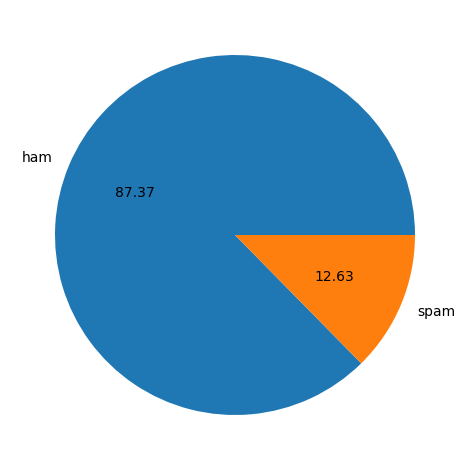

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.tight_layout()
plt.show()

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ajey
[nltk_data]     Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
from nltk.tokenize import word_tokenize,sent_tokenize
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))

In [22]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [23]:
df['num_sentences'] = df['text'].apply(lambda x : len(sent_tokenize(x)))

In [24]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [25]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#Spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

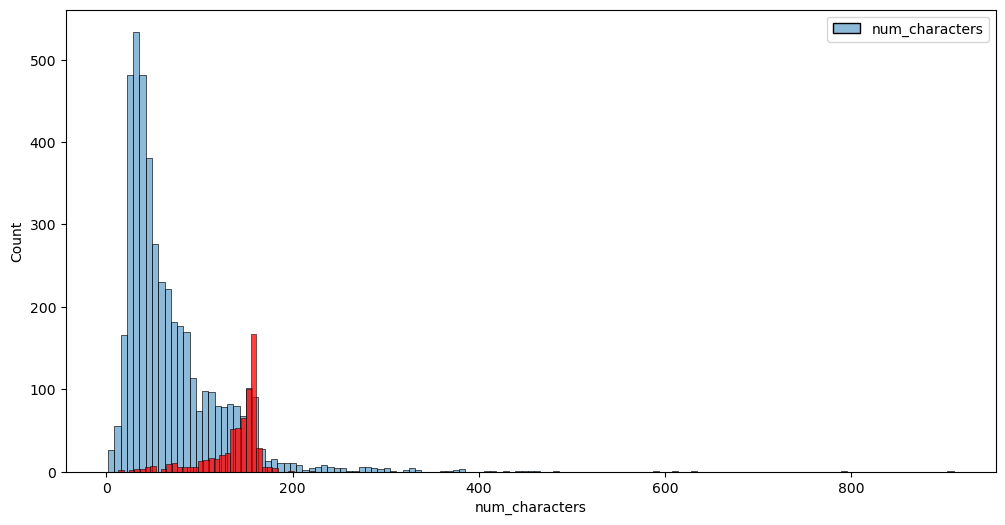

In [27]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0][['num_characters']])
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')

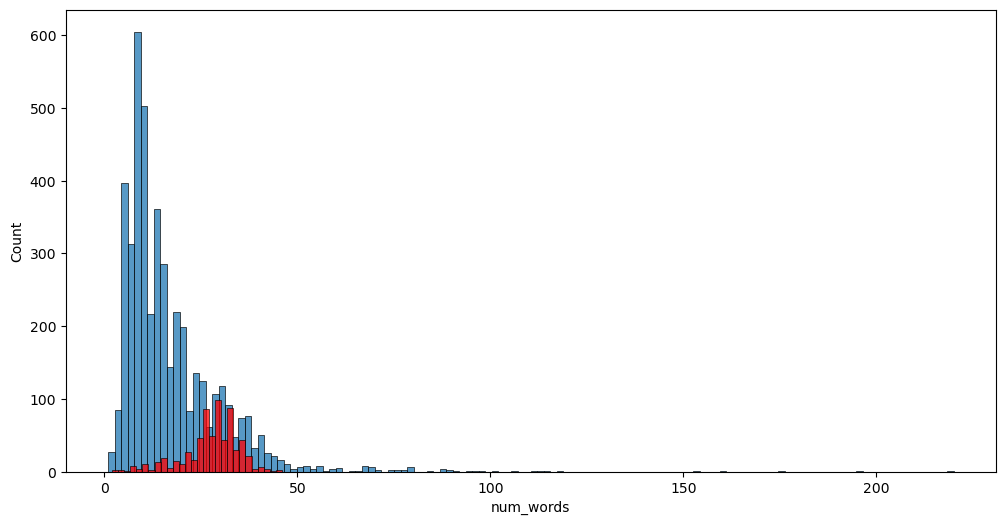

In [28]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color = 'red')
plt.show()

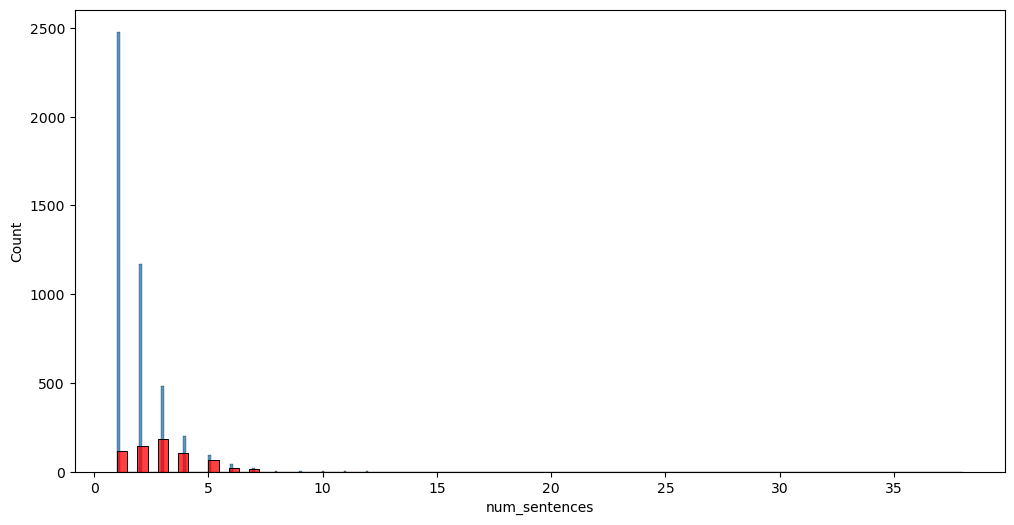

In [29]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color = 'red')
plt.show()

In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
#Data Preprocessing 1. lower 2. Tokenization 3. stopword and punc  4. stemming
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [33]:
def transform_text(text):
    text = text.lower()
    text = nltk.tokenize.word_tokenize(text)
    new_text = []
    for i in text:
        if i.isalnum() and i not in stop_words and i not in string.punctuation:
            new_text.append(stemmer.stem(i))
    
    
    return " ".join(new_text)

In [34]:
transform_text("Hi My name is Josh it is a huge pleasure to meet you and I am here to learn ML . . ...!!!!")

'hi name josh huge pleasur meet learn ml'

In [35]:
df['preprocessed_text'] = df['text'].apply(lambda x : transform_text(x))

In [36]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [37]:
df['preprocessed_text'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [38]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size= 10, background_color="white")

In [39]:
spam_wc = wc.generate(df[df['target'] == 1]['preprocessed_text'].str.cat(sep = " "))

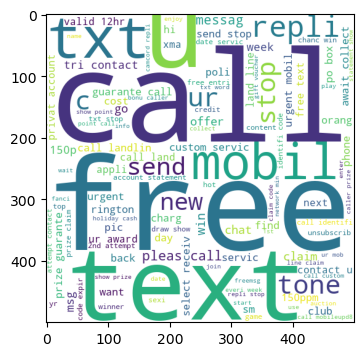

In [40]:
plt.figure(figsize = (12,4))
plt.imshow(spam_wc)

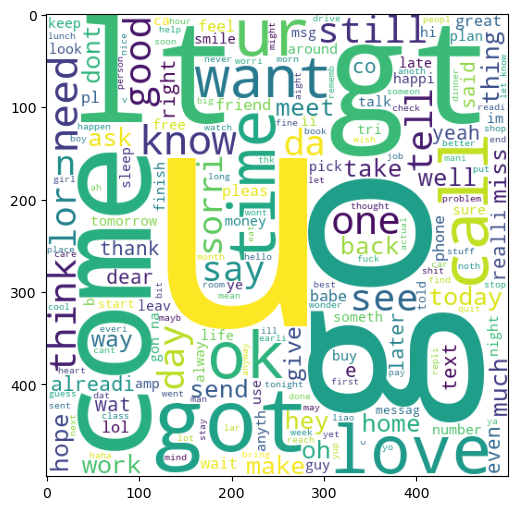

In [41]:
ham_wc = wc.generate(df[df['target'] == 0]['preprocessed_text'].str.cat(sep = " "))
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [42]:
spam_corpus = []
for msg in df[df['target'] == 1]['preprocessed_text'].tolist():
    for word in word_tokenize(msg):
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [43]:
len(spam_corpus)

9939

In [44]:
len(set(spam_corpus))

2222

In [45]:
from collections import Counter
new = pd.DataFrame(Counter(spam_corpus).most_common(30), columns = ['word','count'])

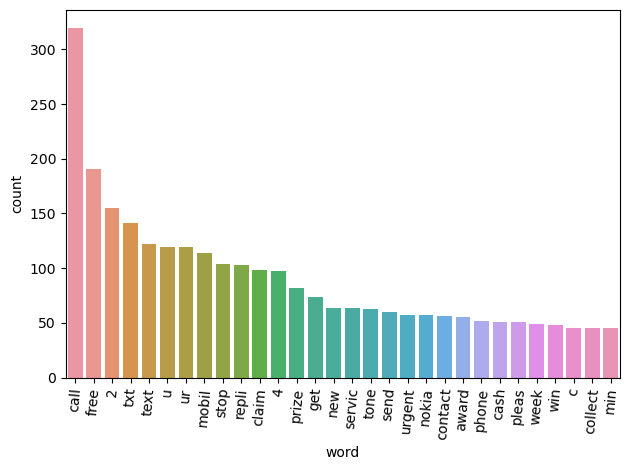

In [46]:
sns.barplot(x= 'word', y = 'count', data = new)
plt.xticks(rotation = 85)
plt.tight_layout()
plt.show()

In [47]:
ham_corpus = []
for msg in df[df['target'] == 0]['preprocessed_text'].tolist():
    for i in word_tokenize(msg):
        ham_corpus.append(i)
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [48]:
from collections import Counter
new2 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns = ['word','count'])

In [49]:
new2

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


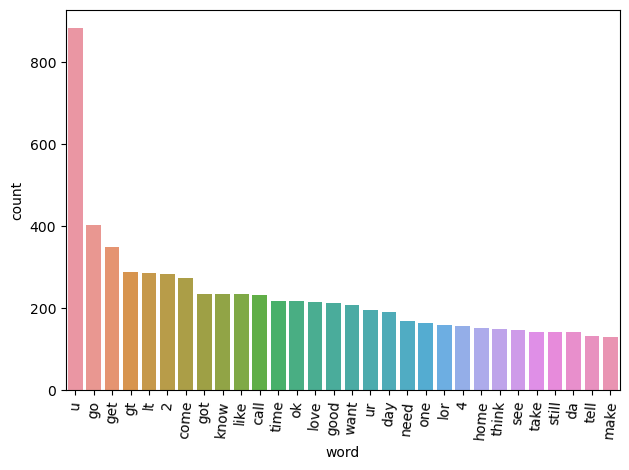

In [50]:
sns.barplot(x= 'word', y = 'count', data = new2)
plt.xticks(rotation = 85)
plt.tight_layout()
plt.show()

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [53]:
X = tfidf.fit_transform(df['preprocessed_text']).toarray()

In [54]:
X.shape

(5169, 3000)

In [55]:
Y = df['target'].values

In [56]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 2)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(precision_score(Y_test,y_pred))

[[788 108]
 [ 27 111]]
0.8694390715667312
0.5068493150684932


In [62]:
mnb.fit(X_train, Y_train)
y_pred1 = mnb.predict(X_test)
print(confusion_matrix(Y_test,y_pred1))
print(accuracy_score(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

[[896   0]
 [ 30 108]]
0.9709864603481625
1.0


In [63]:
bnb.fit(X_train, Y_train)
y_pred2 = bnb.predict(X_test)
print(confusion_matrix(Y_test,y_pred2))
print(accuracy_score(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

[[895   1]
 [ 16 122]]
0.9835589941972921
0.991869918699187


In [64]:
#IMPROVING THE MODEL
# 1. Change the max_features parameter of TF-IDF
# 2. Try Scaling  

In [65]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))